# Flight Predictions

## 0. EDA

**Data Overview:**
   - Load and inspect the dataset (head, data types, missing values).
   - Check for outliers, null values, and duplicates.
   - Identify categorical and numerical features.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing necessary libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'flights_sample_3m.csv'  # Ensure the file is in the same directory
df = pd.read_csv(file_path)

# Display the head of the dataframe to understand the structure
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Get an overview of data types and non-null counts
print(df.info())

# Basic statistics for numerical columns
print(df.describe())


      FL_DATE                AIRLINE                AIRLINE_DOT AIRLINE_CODE  \
0  2019-01-09  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
1  2022-11-19   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
2  2022-07-22  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
3  2023-03-06   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
4  2020-02-23       Spirit Air Lines       Spirit Air Lines: NK           NK   

   DOT_CODE  FL_NUMBER ORIGIN          ORIGIN_CITY DEST  \
0     19977     1562.0    FLL  Fort Lauderdale, FL  EWR   
1     19790     1149.0    MSP      Minneapolis, MN  SEA   
2     19977      459.0    DEN           Denver, CO  MSP   
3     19790     2295.0    MSP      Minneapolis, MN  SFO   
4     20416      407.0    MCO          Orlando, FL  DFW   

               DEST_CITY  ...  DIVERTED  CRS_ELAPSED_TIME  ELAPSED_TIME  \
0             Newark, NJ  ...       0.0             186.0         176.0   
1            S

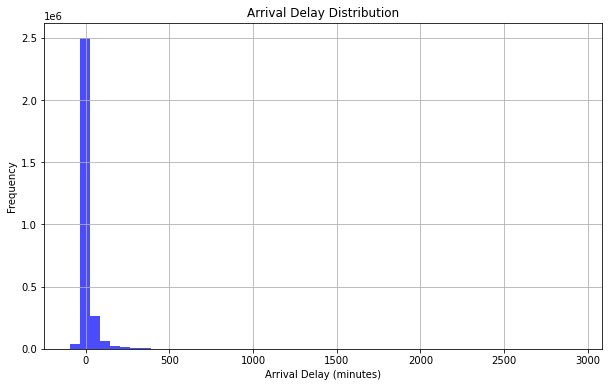

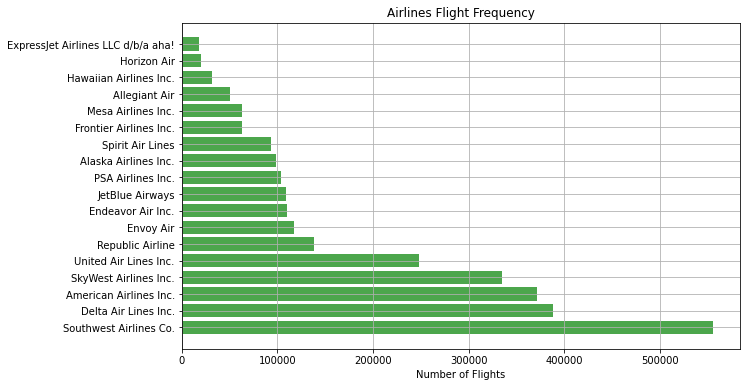

ValueError: could not convert string to float: '2019-01-09'

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded in df
# df = pd.read_csv("flights_sample_3m.csv")

# Step 1: Data cleaning
# Replace infinite values with NaN, and drop rows with NaN values in 'ARR_DELAY'
df_clean = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['ARR_DELAY'])

# Step 2: Univariate analysis using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df_clean['ARR_DELAY'].dropna(), bins=50, color='blue', alpha=0.7)
plt.title('Arrival Delay Distribution')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 3: Airlines distribution using Matplotlib
plt.figure(figsize=(10, 6))
airline_counts = df_clean['AIRLINE'].value_counts()
plt.barh(airline_counts.index, airline_counts.values, color='green', alpha=0.7)
plt.title('Airlines Flight Frequency')
plt.xlabel('Number of Flights')
plt.grid(True)
plt.show()

# Step 4: Correlation heatmap (manually created) for numerical features
correlation_matrix = df_clean.corr()

plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

# Step 5: Time-series analysis using Matplotlib
df_clean['FL_DATE'] = pd.to_datetime(df_clean['FL_DATE'])  # Ensure date column is in datetime format
df_clean['year_month'] = df_clean['FL_DATE'].dt.to_period('M')
monthly_delays = df_clean.groupby('year_month')['ARR_DELAY'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(monthly_delays['year_month'].astype(str), monthly_delays['ARR_DELAY'], marker='o', linestyle='-', color='purple')
plt.xticks(rotation=45)
plt.title('Average Arrival Delay Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Arrival Delay (minutes)')
plt.grid(True)
plt.show()


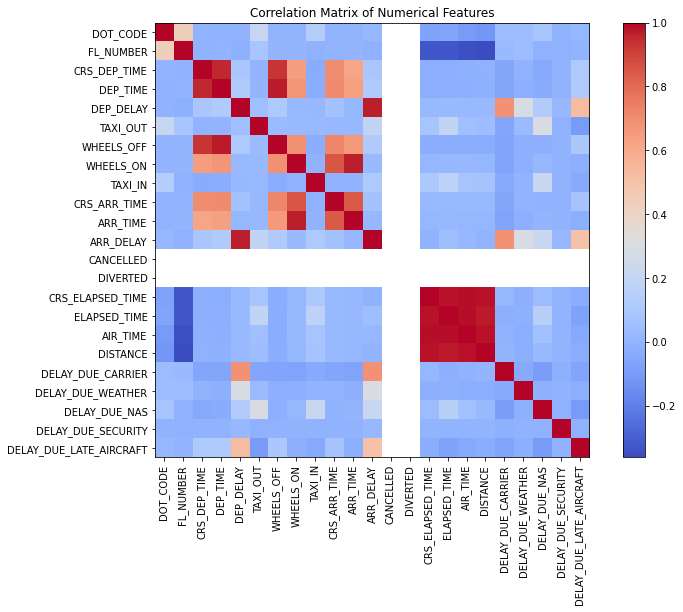

In [ ]:
# Step 4: Correlation heatmap for numerical features (filtering non-numerical columns)
numerical_df = df_clean.select_dtypes(include=[np.number])  # Select only numerical columns
correlation_matrix = numerical_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()


---

**Univariate Analysis:**
   - **Categorical Features**: Bar plots of airline, origin, destination, etc.
   - **Numerical Features**: Histograms or KDE plots of delay times, distances, air time, etc.

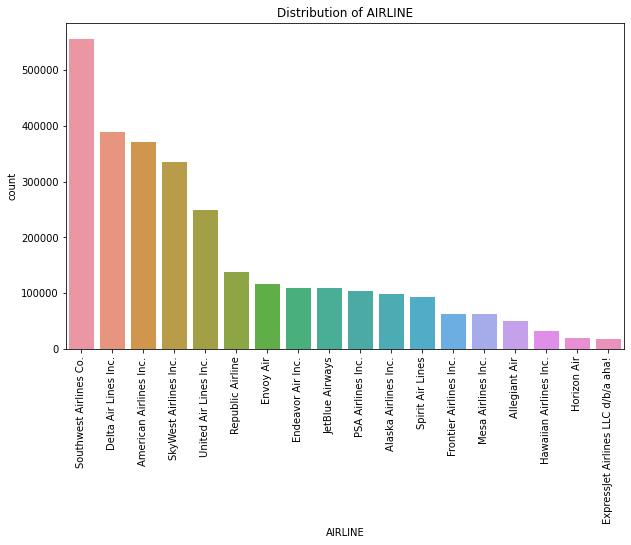

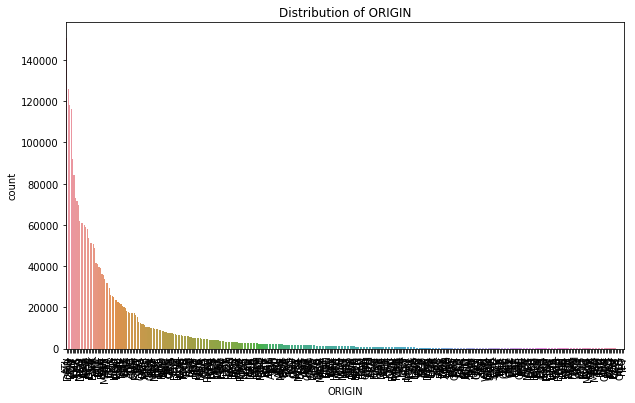

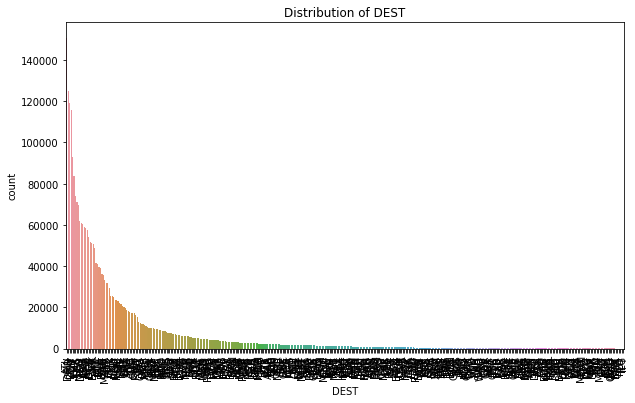

OptionError: No such keys(s): 'mode.use_inf_as_null'

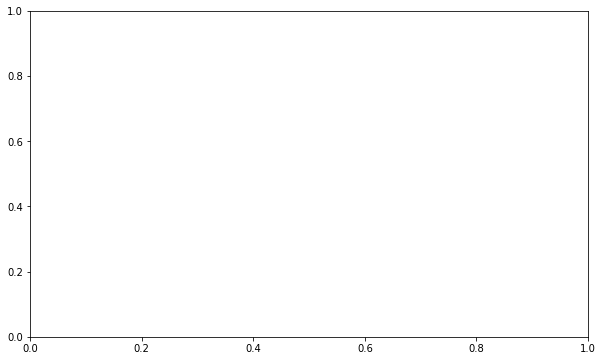

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Univariate Analysis for Categorical Features (Bar Plots)
# List of categorical columns to analyze
categorical_cols = ['AIRLINE', 'ORIGIN', 'DEST']

# Plot bar charts for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_clean, x=col, order=df_clean[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

# Step 2: Univariate Analysis for Numerical Features (Histograms and KDE plots)
# List of numerical columns to analyze
numerical_cols = ['DEP_DELAY', 'ARR_DELAY', 'DISTANCE', 'AIR_TIME']

# Plot histograms and KDE plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_clean[col].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}')
    plt.show()


**Multivariate Analysis:**
   - Correlation heatmap of numerical features.
   - Pair plots for relationships between key variables (e.g., departure delay vs. arrival delay).

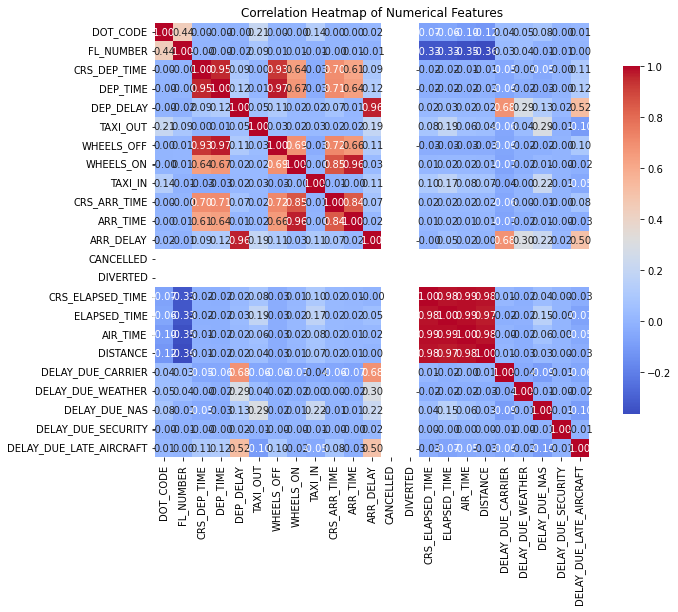

OptionError: No such keys(s): 'mode.use_inf_as_null'

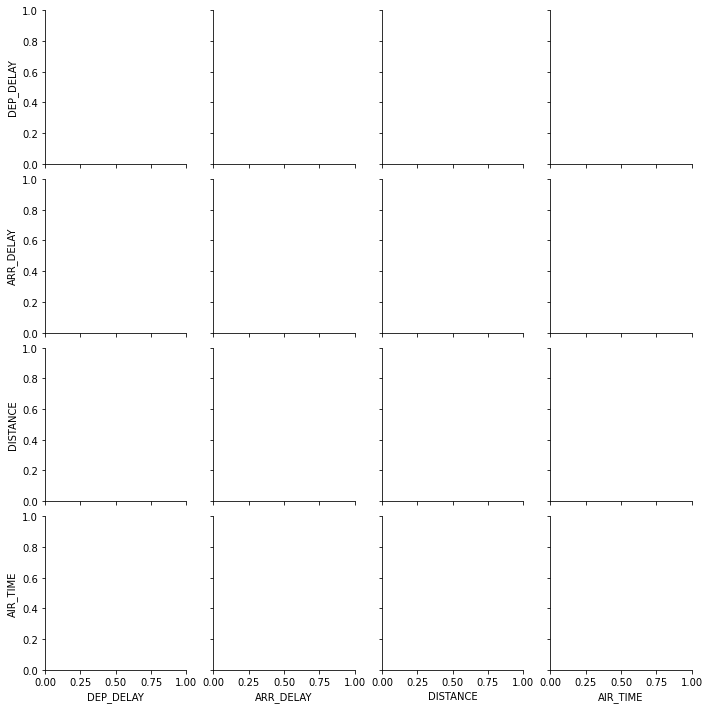

In [ ]:
# Step 1: Filter to keep only numeric columns for correlation analysis
numeric_df = df_clean.select_dtypes(include=[np.number])

# Step 2: Correlation Heatmap of Numerical Features
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Step 3: Pair Plots for Relationships Between Key Variables
# Define the key variables for pair plots
key_variables = ['DEP_DELAY', 'ARR_DELAY', 'DISTANCE', 'AIR_TIME']

# Ensure the key variables exist in the numeric DataFrame
key_variables = [var for var in key_variables if var in numeric_df.columns]

# Plot pair plots for the key variables
sns.pairplot(numeric_df[key_variables])
plt.suptitle('Pair Plots of Key Variables', y=1.02)  # Adjust title position
plt.show()


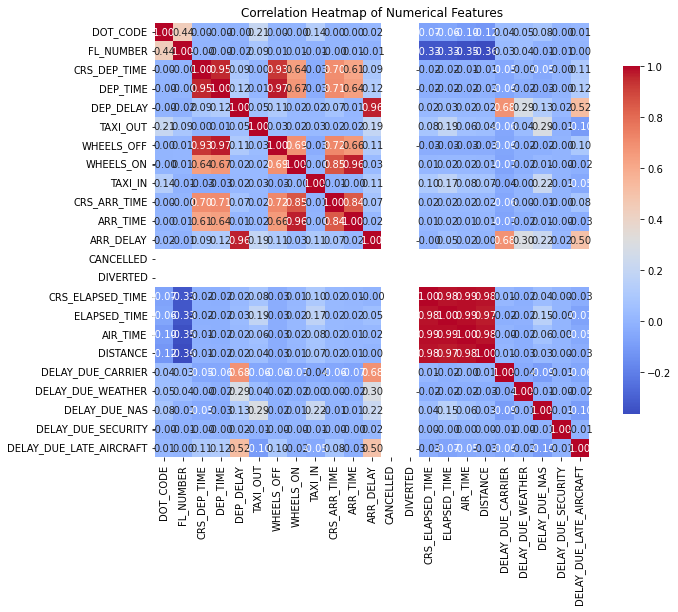

OptionError: No such keys(s): 'mode.use_inf_as_null'

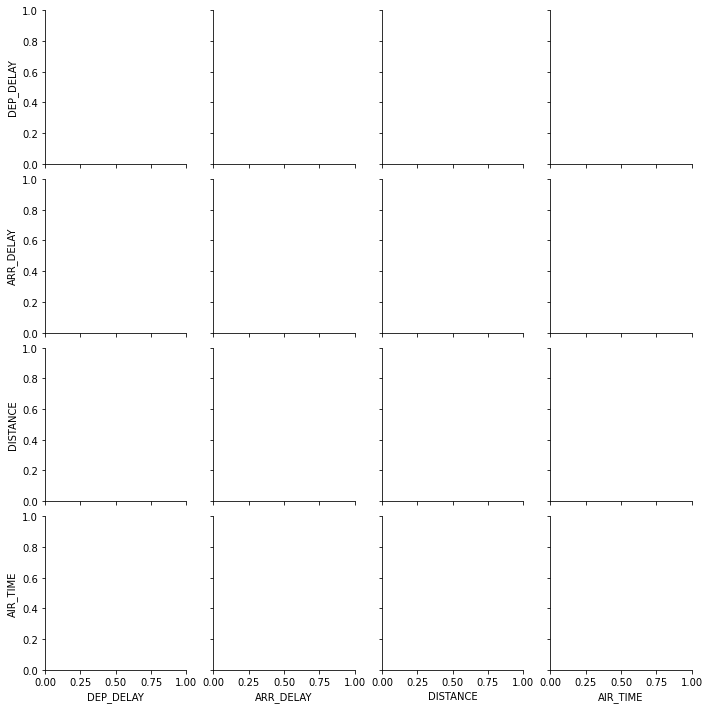

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure you have cleaned the DataFrame df_clean before this point

# Step 1: Keep only numeric columns for correlation analysis
numeric_df = df_clean.select_dtypes(include=[np.number])

# Step 2: Correlation Heatmap of Numerical Features
plt.figure(figsize=(12, 8))
if not numeric_df.empty:  # Check if there are numeric columns
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Heatmap of Numerical Features')
    plt.show()
else:
    print("No numeric columns available for correlation analysis.")

# Step 3: Pair Plots for Relationships Between Key Variables
# Define the key variables for pair plots
key_variables = ['DEP_DELAY', 'ARR_DELAY', 'DISTANCE', 'AIR_TIME']

# Filter key variables to include only those present in numeric_df
key_variables = [var for var in key_variables if var in numeric_df.columns]

if key_variables:
    sns.pairplot(numeric_df[key_variables])
    plt.suptitle('Pair Plots of Key Variables', y=1.02)  # Adjust title position
    plt.show()
else:
    print("No key variables available for pair plots.")


**Target Variable Analysis (Delays):**
   - Distribution of delay categories (on-time, delayed, canceled).
   - Box plots of delays by airlines, origin/destination airports.

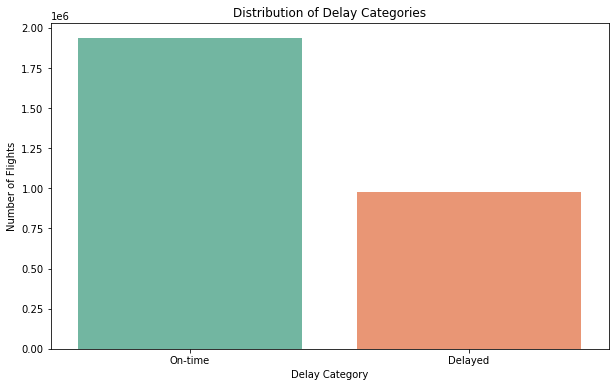

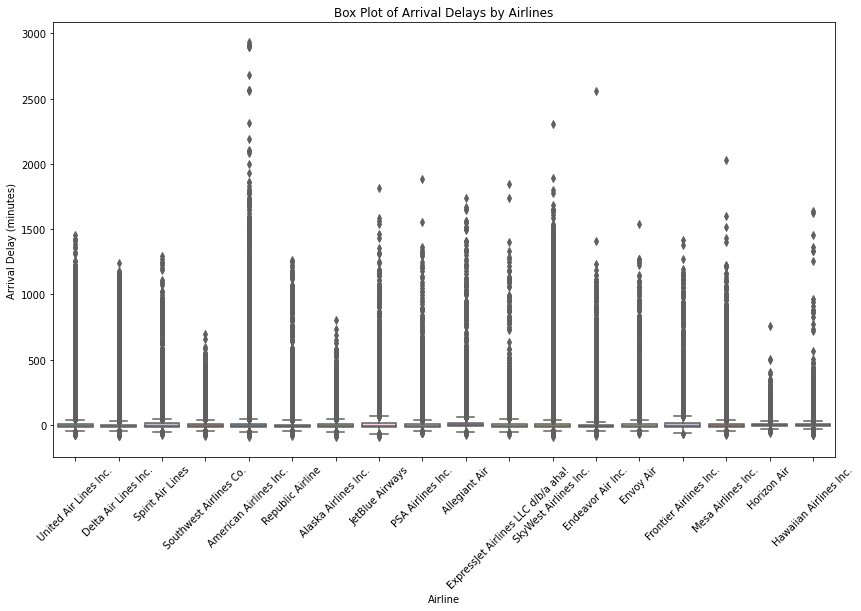

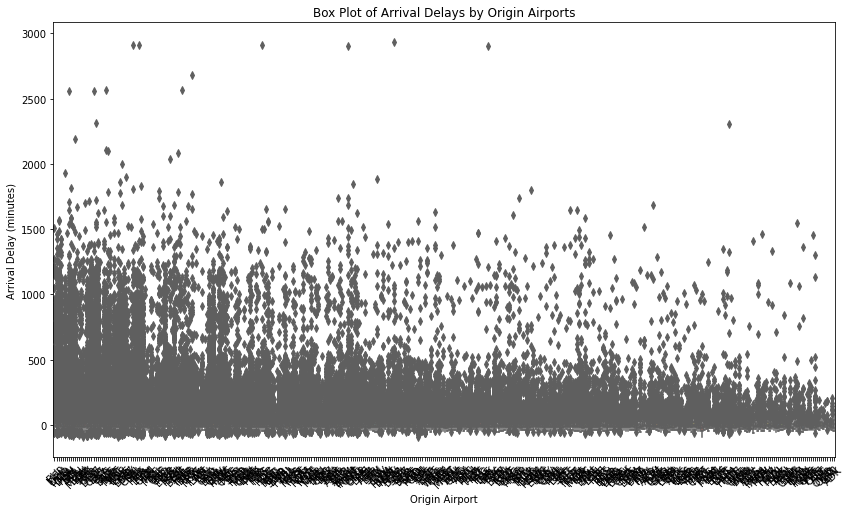

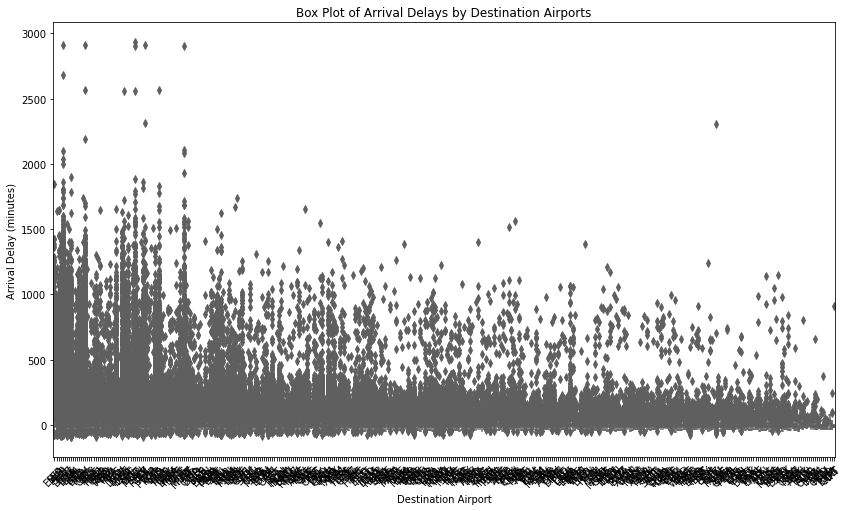

In [ ]:
# Step 1: Create Delay Categories
def categorize_delay(row):
    if row['CANCELLED'] == 1:
        return 'Canceled'
    elif row['ARR_DELAY'] <= 0:
        return 'On-time'
    else:
        return 'Delayed'

# Apply the categorization
df_clean['Delay_Category'] = df_clean.apply(categorize_delay, axis=1)

# Step 2: Distribution of Delay Categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Delay_Category', palette='Set2')
plt.title('Distribution of Delay Categories')
plt.xlabel('Delay Category')
plt.ylabel('Number of Flights')
plt.show()

# Step 3: Box Plots of Delays by Airlines
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_clean, x='AIRLINE', y='ARR_DELAY', palette='Set3')
plt.title('Box Plot of Arrival Delays by Airlines')
plt.xlabel('Airline')
plt.ylabel('Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

# Step 4: Box Plots of Delays by Origin Airports
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_clean, x='ORIGIN', y='ARR_DELAY', palette='Set3')
plt.title('Box Plot of Arrival Delays by Origin Airports')
plt.xlabel('Origin Airport')
plt.ylabel('Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

# Step 5: Box Plots of Delays by Destination Airports
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_clean, x='DEST', y='ARR_DELAY', palette='Set3')
plt.title('Box Plot of Arrival Delays by Destination Airports')
plt.xlabel('Destination Airport')
plt.ylabel('Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.show()


**Time Series Analysis:**
   - Analyze delays over time (by month, year) for seasonal trends.

OptionError: No such keys(s): 'mode.use_inf_as_null'

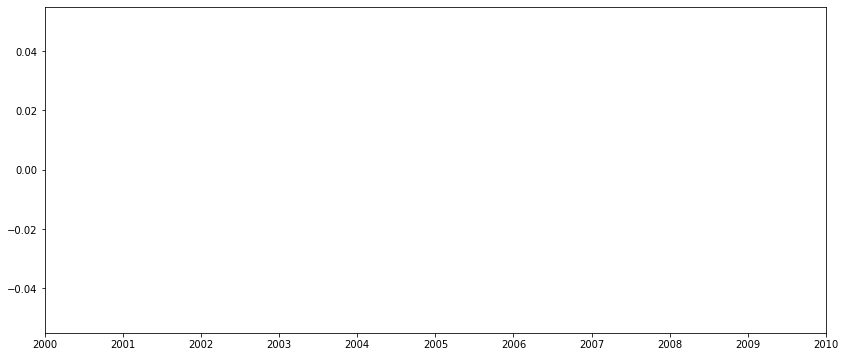

In [ ]:
# Step 1: Convert the flight date column to datetime
df_clean['FL_DATE'] = pd.to_datetime(df_clean['FL_DATE'])

# Step 2: Extract year and month from the date
df_clean['Year'] = df_clean['FL_DATE'].dt.year
df_clean['Month'] = df_clean['FL_DATE'].dt.month

# Step 3: Aggregate average arrival delay by month
monthly_delays = df_clean.groupby(['Year', 'Month'])['ARR_DELAY'].mean().reset_index()

# Create a date column for plotting
monthly_delays['Date'] = pd.to_datetime(monthly_delays[['Year', 'Month']].assign(DAY=1))

# Step 4: Visualize average delays over time (monthly)
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_delays, x='Date', y='ARR_DELAY', marker='o')
plt.title('Average Arrival Delay Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Step 5: Aggregate average arrival delay by year
yearly_delays = df_clean.groupby('Year')['ARR_DELAY'].mean().reset_index()

# Step 6: Visualize average delays over time (yearly)
plt.figure(figsize=(14, 6))
sns.barplot(data=yearly_delays, x='Year', y='ARR_DELAY', palette='Set2')
plt.title('Average Arrival Delay Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.grid()
plt.show()


**Geographical Analysis:**
   - Visualize delays by origin and destination using maps.

In [ ]:
'''
pip install geopandas geopy matplotlib

'''

'\npip install geopandas geopy matplotlib\n\n'

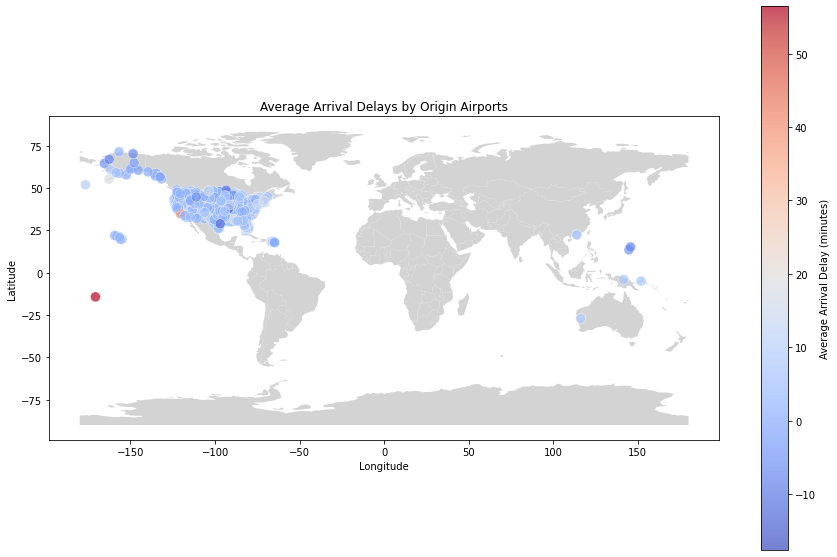

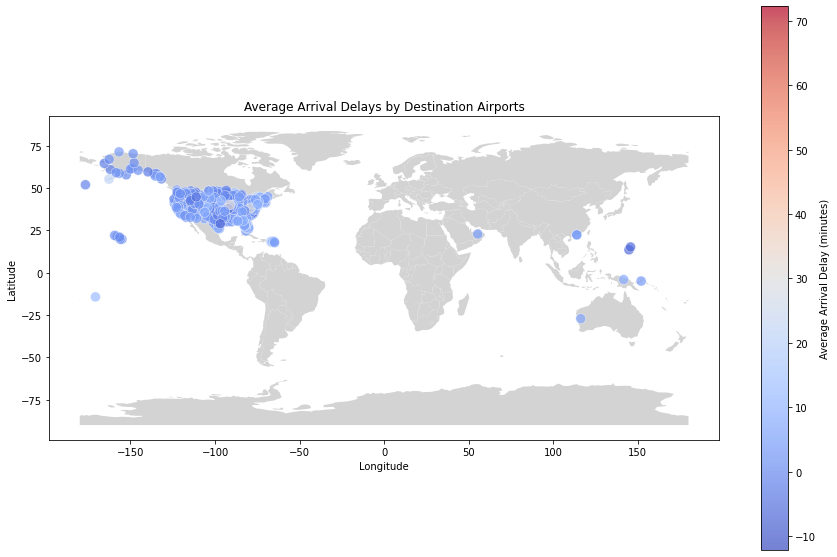

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

# Step 1: Aggregate average delays by origin and destination
origin_delays = df_clean.groupby('ORIGIN')['ARR_DELAY'].mean().reset_index()
destination_delays = df_clean.groupby('DEST')['ARR_DELAY'].mean().reset_index()

# Step 2: Get geographical coordinates for each airport using geopy
geolocator = Nominatim(user_agent="flight_analysis")

def get_coordinates(airport_code):
    try:
        location = geolocator.geocode(f"{airport_code} Airport")
        return location.latitude, location.longitude
    except:
        return None, None

# Get coordinates for origin airports
origin_delays['Coordinates'] = origin_delays['ORIGIN'].apply(get_coordinates)
origin_delays['Latitude'] = origin_delays['Coordinates'].apply(lambda x: x[0])
origin_delays['Longitude'] = origin_delays['Coordinates'].apply(lambda x: x[1])

# Get coordinates for destination airports
destination_delays['Coordinates'] = destination_delays['DEST'].apply(get_coordinates)
destination_delays['Latitude'] = destination_delays['Coordinates'].apply(lambda x: x[0])
destination_delays['Longitude'] = destination_delays['Coordinates'].apply(lambda x: x[1])

# Step 3: Visualize average delays by origin airports
fig, ax = plt.subplots(figsize=(15, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot world map
world.plot(ax=ax, color='lightgrey')

# Plot origin delays
plt.scatter(origin_delays['Longitude'], origin_delays['Latitude'],
            c=origin_delays['ARR_DELAY'], cmap='coolwarm', s=100, alpha=0.7, edgecolors="w", linewidth=0.5)

plt.title('Average Arrival Delays by Origin Airports')
plt.colorbar(label='Average Arrival Delay (minutes)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Step 4: Visualize average delays by destination airports
fig, ax = plt.subplots(figsize=(15, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot world map
world.plot(ax=ax, color='lightgrey')

# Plot destination delays
plt.scatter(destination_delays['Longitude'], destination_delays['Latitude'],
            c=destination_delays['ARR_DELAY'], cmap='coolwarm', s=100, alpha=0.7, edgecolors="w", linewidth=0.5)

plt.title('Average Arrival Delays by Destination Airports')
plt.colorbar(label='Average Arrival Delay (minutes)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


---

### Post-EDA Structure:

1. **Feature Engineering:**
   - **Time-based Features**: Extract day of week, month, hour from `FL_DATE`.
   - **Interaction Terms**: Create interaction terms for important features (e.g., distance × airline).
   - **Categorical Encoding**: One-hot encode categorical variables like `AIRLINE` and `ORIGIN`.
   - **Missing Data Handling**: Impute or drop rows with missing values (e.g., delays due to weather).

2. **Model Selection:**
   - **Baseline Models**: Start with logistic regression and decision trees for delay classification.
   - **Advanced Models**: Use Random Forest, XGBoost for improved accuracy.
   - **Hyperparameter Tuning**: Use grid search or random search for optimization.

3. **Evaluation Metrics:**
   - Accuracy, precision, recall, F1-score, and AUC-ROC for classification.
   - Use cross-validation to avoid overfitting.

4. **Visualization:**
   - **Feature Importance**: Visualize feature importance for tree-based models.
   - **Confusion Matrix**: Visualize the confusion matrix for model evaluation.
   - **Delay Trends**: Plot delays over time (line plots, area charts).

5. **Interactive Visualizations for Web:**
   - **Plotly**: Use Plotly for creating interactive plots (e.g., scatter plots, bar charts) that can be embedded on a website.
   - **Folium**: Interactive map visualizations to display delays geographically.
   - **Dash**: Build a simple web app using Dash to display model predictions and visualizations interactively.



# 1. Feature Engineering

## 1.1 Extract Time-Based Features

We can extract useful features like day of the week, month, and hour from the FL_DATE column.

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

# Extract day of the week
df['day_of_week'] = df['FL_DATE'].dt.dayofweek  # Monday=0, Sunday=6

# Extract month
df['month'] = df['FL_DATE'].dt.month

# Extract hour of the day from departure time
df['hour_of_day'] = df['DEP_TIME'] // 100  # Assuming DEP_TIME is in HHMM format


## 1.2 Interaction Terms

We can create interaction terms for important features. For example, we can combine DISTANCE and AIRLINE to check if longer flights with specific airlines show a particular trend for delays.

In [ ]:
# Create an interaction term between 'DISTANCE' and 'AIRLINE'
df['distance_airline_interaction'] = df['DISTANCE'] * df['AIRLINE'].astype('category').cat.codes

## 1.3 Categorical Encoding

For machine learning models, categorical variables like AIRLINE, ORIGIN, and DEST should be converted into numerical format. We'll use One-Hot Encoding for models like Logistic Regression or Label Encoding for tree-based models like Random Forest.

In [ ]:
# One-hot encoding for 'AIRLINE', 'ORIGIN', 'DEST'
df = pd.get_dummies(df, columns=['AIRLINE', 'ORIGIN', 'DEST'], drop_first=True)

In [ ]:
print(df.columns)


Index(['FL_DATE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'FL_NUMBER',
       'ORIGIN_CITY', 'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       ...
       'DEST_VEL', 'DEST_VLD', 'DEST_VPS', 'DEST_WRG', 'DEST_WYS', 'DEST_XNA',
       'DEST_XWA', 'DEST_YAK', 'DEST_YKM', 'DEST_YUM'],
      dtype='object', length=793)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for 'AIRLINE', 'ORIGIN', 'DEST'
# Label encoding for 'AIRLINE_DOT', 'ORIGIN_CITY', 'DEST_CITY'
le = LabelEncoder()
df['AIRLINE_DOT'] = le.fit_transform(df['AIRLINE_DOT'])
df['ORIGIN_CITY'] = le.fit_transform(df['ORIGIN_CITY'])
df['DEST_CITY'] = le.fit_transform(df['DEST_CITY'])

## 1.4 Handling Missing Data

First, identify missing values, then decide whether to impute or drop them.



In [ ]:
# Check for missing values
print(df.isnull().sum())

# For simplicity, let's fill missing delay columns with 0 (assuming no delay)
df['DELAY_DUE_WEATHER'].fillna(0, inplace=True)
df['DELAY_DUE_CARRIER'].fillna(0, inplace=True)
df['DELAY_DUE_LATE_AIRCRAFT'].fillna(0, inplace=True)
df['DELAY_DUE_NAS'].fillna(0, inplace=True)
df['DELAY_DUE_SECURITY'].fillna(0, inplace=True)

FL_DATE         0
AIRLINE_DOT     0
AIRLINE_CODE    0
DOT_CODE        0
FL_NUMBER       1
               ..
DEST_XNA        0
DEST_XWA        0
DEST_YAK        0
DEST_YKM        0
DEST_YUM        0
Length: 793, dtype: int64


<ipython-input-10-058790197c86>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DELAY_DUE_WEATHER'].fillna(0, inplace=True)
<ipython-input-10-058790197c86>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

## 1.5 Feature Scaling

For distance-based features, scaling can be helpful for certain models like Logistic Regression or Neural Networks.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['DISTANCE'] = scaler.fit_transform(df[['DISTANCE']])

## 1.6 Check Transformed Dataframe

In [ ]:
df.head()

,FL_DATE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,DEST_VEL,DEST_VLD,DEST_VPS,DEST_WRG,DEST_WYS,DEST_XNA,DEST_XWA,DEST_YAK,DEST_YKM,DEST_YUM
0,2019-01-09,17,UA,19977,1562.0,117,235,1155.0,1151.0,-4.0,...,False,False,False,False,False,False,False,False,False,False
1,2022-11-19,3,DL,19790,1149.0,218,311,2120.0,2114.0,-6.0,...,False,False,False,False,False,False,False,False,False,False
2,2022-07-22,17,UA,19977,459.0,88,215,954.0,1000.0,6.0,...,False,False,False,False,False,False,False,False,False,False
3,2023-03-06,3,DL,19790,2295.0,218,296,1609.0,1608.0,-1.0,...,False,False,False,False,False,False,False,False,False,False
4,2020-02-23,16,NK,20416,407.0,252,81,1840.0,1838.0,-2.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(df.columns)


Index(['FL_DATE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'FL_NUMBER',
       'ORIGIN_CITY', 'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       ...
       'DEST_VEL', 'DEST_VLD', 'DEST_VPS', 'DEST_WRG', 'DEST_WYS', 'DEST_XNA',
       'DEST_XWA', 'DEST_YAK', 'DEST_YKM', 'DEST_YUM'],
      dtype='object', length=793)


In [ ]:
# Save the transformed DataFrame to a CSV file
# Save the CSV file with compression
chunk_size = 100000  # Set chunk size depending on your system’s capacity
df.to_csv('data_transformed.csv', index=False, chunksize=chunk_size)


---

# 2. **Model Selection:**
   - **Baseline Models**: Start with logistic regression and decision trees for delay classification.
   - **Advanced Models**: Use Random Forest, XGBoost for improved accuracy.
   - **Hyperparameter Tuning**: Use grid search or random search for optimization.

## **Baseline Models**: Start with logistic regression and decision trees for delay classification. (Jorge & Joel)

### Prepare the Target Variable

In [ ]:
# Create a binary target variable for delay
df['Delayed'] = df['DEP_DELAY'].apply(lambda x: 1 if x > 0 else 0)

# Drop columns that won't be used as features (e.g., DEP_DELAY or FL_DATE)
X = df.drop(['DEP_DELAY', 'Delayed', 'FL_DATE'], axis=1)  # Features
y = df['Delayed']  # Target


### Split the Data into Train and Test Sets


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### (1) Random Forest Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and already preprocessed
# If not, preprocess the FL_DATE and other datetime fields as done previously

# Step 1: Create a binary target variable for delay (classification)
df['Delayed'] = df['DEP_DELAY'].apply(lambda x: 1 if x > 0 else 0)

# Step 2: Drop unnecessary columns, such as 'CANCELLATION_CODE', 'DEP_DELAY', 'FL_DATE'
df = df.drop(['CANCELLATION_CODE', 'FL_DATE', 'DEP_DELAY'], axis=1)

# Step 3: Identify categorical columns that need encoding
categorical_columns = ['AIRLINE_CODE', 'DOT_CODE', 'ORIGIN_CITY', 'DEST_CITY']

# Step 4: Apply one-hot encoding for these columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Step 5: Split the data into features (X) and target (y)
X = df_encoded.drop('Delayed', axis=1)  # Features
y = df_encoded['Delayed']  # Target variable

# Step 6: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Scale the continuous features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 9: Train the Random Forest model
rf_model.fit(X_train_scaled, y_train)

# Step 10: Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Step 11: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 85.55%
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90     15776
           1       0.89      0.64      0.75      7786

    accuracy                           0.86     23562
   macro avg       0.87      0.80      0.82     23562
weighted avg       0.86      0.86      0.85     23562



AUC Score: 0.90


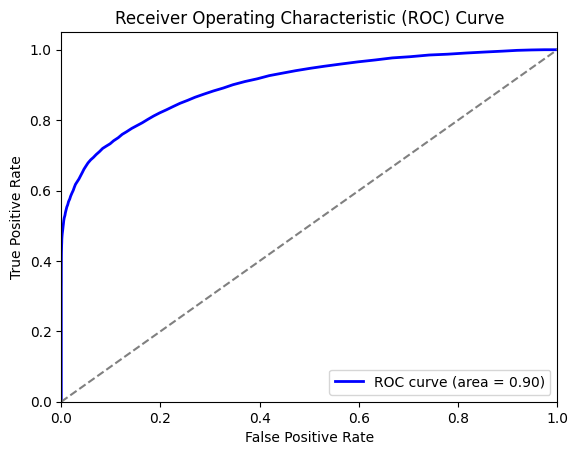

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Step 12: Calculate predicted probabilities (for AUC)
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class (Delayed = 1)

# Step 13: Calculate the AUC score
auc = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc:.2f}")

# Step 14: Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### (2) Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Split the data into features (X) and target (y)
X = df_encoded.drop('Delayed', axis=1)  # Features
y = df_encoded['Delayed']  # Target variable

# Step 2: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Impute missing values (replacing NaNs with the mean of each feature)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 4: Scale the continuous features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Step 5: Initialize the SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Step 6: Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Step 7: Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 9: Calculate predicted probabilities (for AUC)
y_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

# Step 10: Calculate the AUC score
auc = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc:.2f}")

# Step 11: Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc="lower right")
plt.show()


### (3) Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Split the data into features (X) and target (y)
X = df_encoded.drop('Delayed', axis=1)  # Features
y = df_encoded['Delayed']  # Target variable

# Step 2: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Impute missing values (replacing NaNs with the mean of each feature)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 4: Scale the continuous features (optional for Naive Bayes but keeping consistent with previous models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Step 5: Initialize the Naive Bayes model
nb_model = GaussianNB()

# Step 6: Train the Naive Bayes model
nb_model.fit(X_train_scaled, y_train)

# Step 7: Make predictions on the test set
y_pred = nb_model.predict(X_test_scaled)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 9: Calculate predicted probabilities (for AUC)
y_prob = nb_model.predict_proba(X_test_scaled)[:, 1]

# Step 10: Calculate the AUC score
auc = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc:.2f}")

# Step 11: Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()


## **Advanced Models**: Use Random Forest, XGBoost for improved accuracy. (Kiki & WS)